<a href="https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-2-public/blob/adding_C3/C3/W1/ungraded_labs/C3_W1_Lab_1_tfds_hello_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TFDS Hello World

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In this notebook we will take a look at the simple Hello World scenario of TensorFlow Datasets (TFDS). We'll use TFDS to perform the extract, transform, and load processes for the MNIST dataset.

## Setup

We'll start by importing TensorFlow, TensorFlow Datasets, and Matplotlib.

In [1]:
try:
    %tensorflow_version 2.x
except:
    pass

In [2]:
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

print("\u2022 Using TensorFlow Version:", tf.__version__)

2023-07-20 15:01:18.237222: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


• Using TensorFlow Version: 2.12.0


## Extract - Transform - Load (ETL)

Now we'll run the **ETL** code. First, to perform the **Extract** process we use `tfts.load`. This handles everything from downloading the raw data to parsing and splitting it, giving us a dataset. Next, we perform the **Transform** process. In this simple example, our transform process will just consist of shuffling the dataset. Finally, we **Load** one record by using the `take(1)` method. In this case, each record consists of an image and its corresponding label. After loading the record we proceed to plot the image and print its corresponding label. 

In [3]:
# EXTRACT
dataset = tfds.load(name="mnist", split="train")
# TRANSFORM
dataset.shuffle(100)

2023-07-20 15:01:28.063871: W tensorflow/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /Users/justinho/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


<_ShuffleDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

Label: 4


2023-07-20 15:01:39.743484: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]
2023-07-20 15:01:39.744036: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype string and shape [1]
	 [[{{node Placeholder/_1}}]]
2023-07-20 15:01:39.782310: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline 

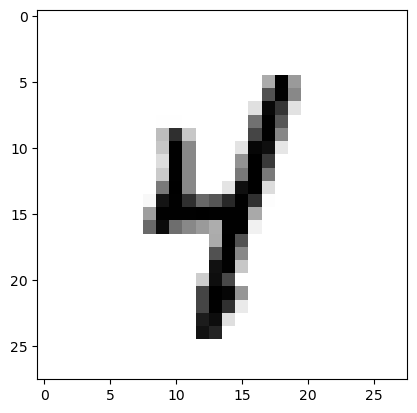

In [4]:
# LOAD
for data in dataset.take(1):
    image = data["image"].numpy().squeeze()
    label = data["label"].numpy()
    
    print("Label: {}".format(label))
    plt.imshow(image, cmap=plt.cm.binary)
    plt.show()